In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [13]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               24 non-null     int64  
 1   month              24 non-null     int64  
 2   interest_rate      24 non-null     float64
 3   unemployment_rate  24 non-null     float64
 4   index_price        24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [4]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


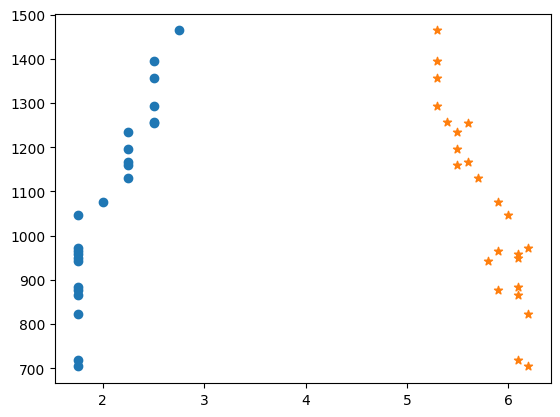

In [11]:
plt.scatter(x=df_index['interest_rate'], y=df_index['index_price'])
plt.scatter(x=df_index['unemployment_rate'], y=df_index['index_price'], marker='*')

In [5]:
X_input = df_index[['interest_rate', 'unemployment_rate']]
X_input

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.25,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


* or we just require three data so it's better to drop all other features

In [14]:
df_index.drop(columns=['year', 'month'], axis=1, inplace=True)

In [15]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

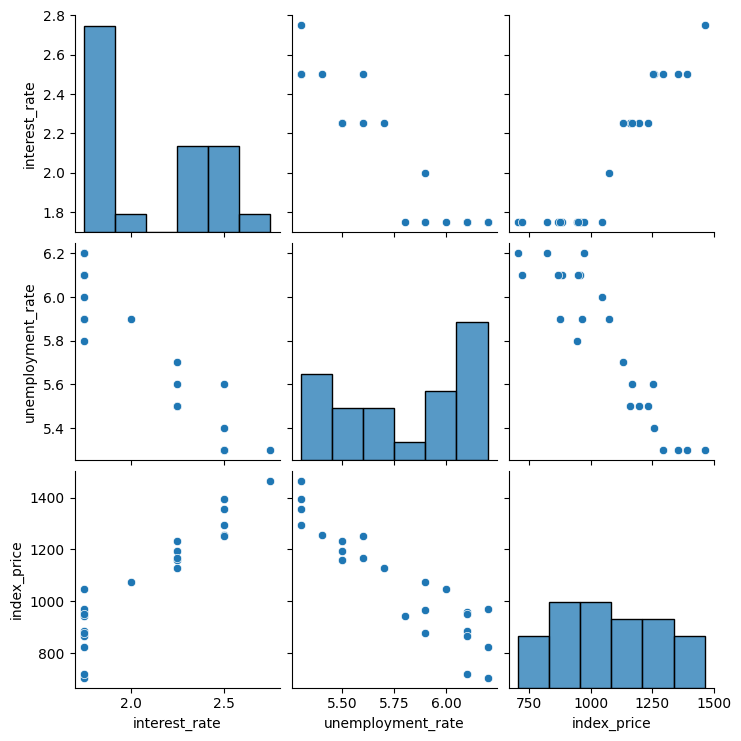

In [18]:
sns.pairplot(df_index)

In [19]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.932937,0.928598
unemployment_rate,-0.932937,1.000000,-0.922338
index_price,0.928598,-0.922338,1.000000


Text(0, 0.5, 'Unemployment_rate')

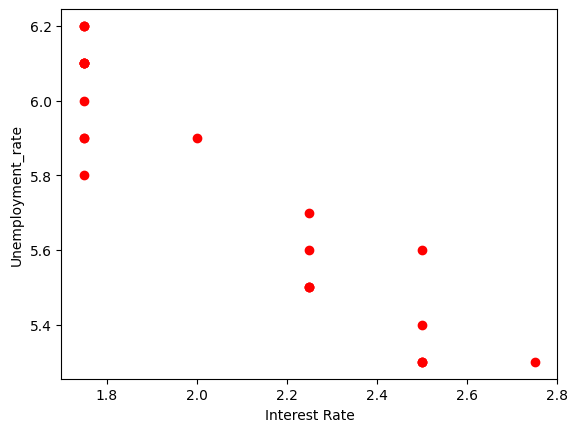

In [22]:
# Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment_rate")

In [23]:
## independent and dependent feature
X_input = df_index[['interest_rate', 'unemployment_rate']]
X_input

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.25,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [26]:
X = df_index.iloc[:, :2]
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.25,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [30]:
y = df_index.iloc[:, -1] # df_index.iloc[:, 2] # df_index.iloc[:, -1]
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

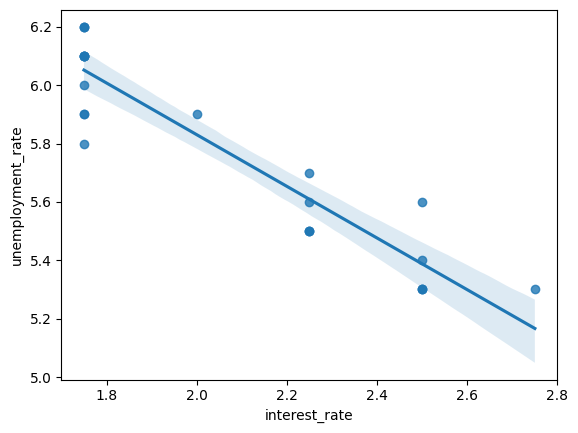

In [40]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])


<Axes: xlabel='interest_rate', ylabel='index_price'>

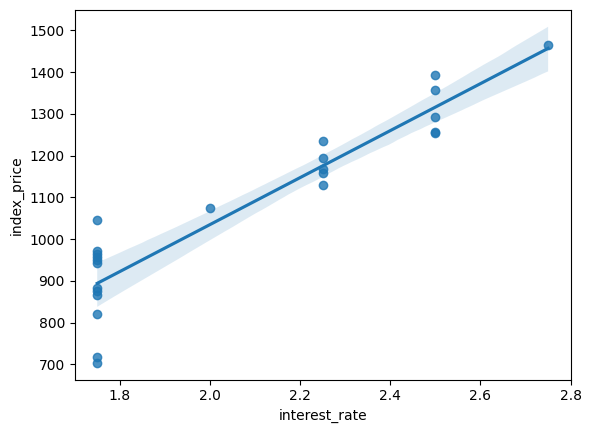

In [41]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

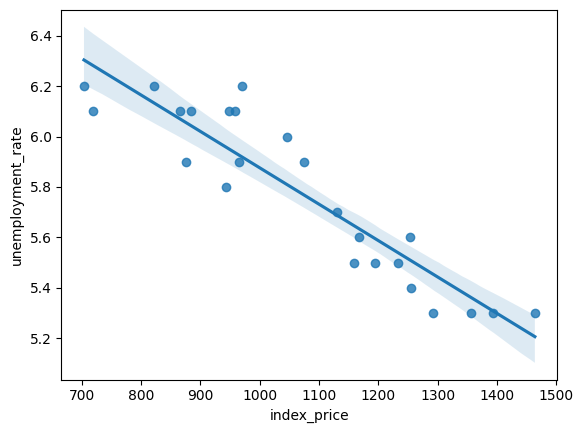

In [42]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[-0.86824314,  0.37908503],
       [ 1.36438208, -1.48187786],
       [-0.86824314,  1.30956648],
       [ 1.36438208, -0.55139641],
       [ 1.36438208, -1.48187786],
       [-0.86824314,  0.68924552],
       [-0.86824314,  0.999406  ],
       [ 1.36438208, -1.48187786],
       [ 1.36438208, -1.17171738],
       [-0.86824314,  1.30956648],
       [-0.86824314,  0.999406  ],
       [-0.86824314,  0.37908503],
       [-0.86824314,  0.999406  ],
       [ 0.62017367, -0.8615569 ],
       [ 0.62017367, -0.24123593],
       [-0.86824314,  0.06892455],
       [-0.86824314,  0.999406  ],
       [ 0.62017367, -0.8615569 ]])

In [46]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [48]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [56]:
validation_score

array([-6659.74981977, -7735.23928057, -5618.51902383])

In [57]:
np.mean(validation_score)

np.float64(-6671.169374723566)

In [ ]:
## prediction
y_pred = regression.predict(X_test)
y_pred

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

6204.119438809299
62.89216071194877
78.76623285907039


In [61]:
from sklearn.metrics import r2_score

In [63]:
score = r2_score(y_test, y_pred)
print(score)

0.8157082765666486


In [64]:
# display adjusted R_squared
1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)

0.692847127611081

## Assumptions

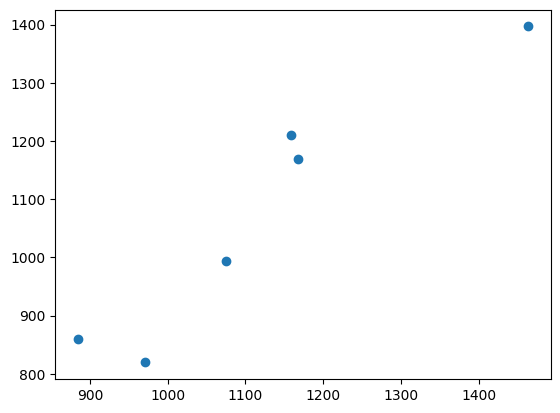

In [67]:
plt.scatter(y_test, y_pred)

as in above y_test and y_pred is showing linear relation it means our model has done well not that much but ok

In [68]:
residual = y_test -y_pred
print(residual)

8     -51.819788
16    151.584478
0      67.327575
18     23.474153
11     80.437508
9      -2.709462
Name: index_price, dtype: float64


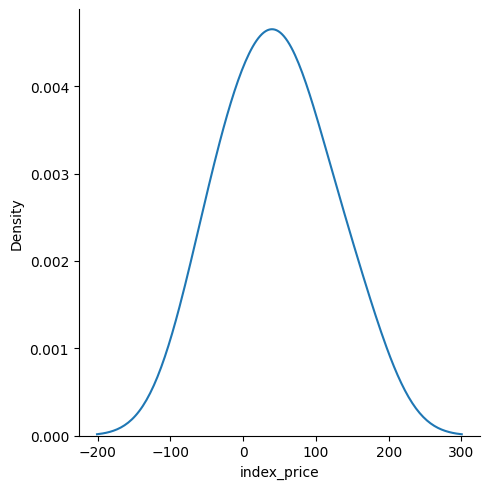

In [69]:
## Plot this residual
sns.displot(residual, kind='kde')

this curve is showing normal distribution means our model performed well.

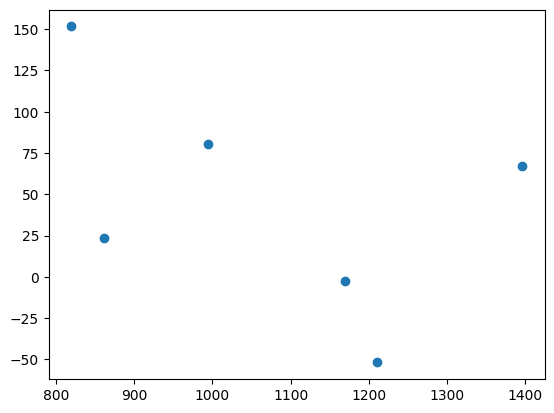

In [73]:
## scatter plot with respect to prediction and residual
plt.scatter(y_pred, residual) # data is uniformlly distributed in this case as it is spreaded everywhere, it doesn't follow any pattern and if it is not following any pattern it means our model has done well.

In [74]:
## OLS
import statsmodels.api as sm

In [75]:
model = sm.OLS(y_train, X_train).fit()

In [76]:
prediction = model.predict(X_test)
print(prediction)

[ 157.37534354 -234.02892292  343.22798063 -192.91859704  -58.88195262
  116.26501767]


In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2838
Date:                Tue, 08 Jul 2025   Prob (F-statistic):                       0.757
Time:                        23:26:26   Log-Likelihood:                         -150.86
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            69.6256    706.386      0.099      0.923   -1427.846    1567.097
x2          -132.5453    706.386     -0.188      0.854   -1630.017    1364.926
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.019
Skew:                          -0.020   Prob(JB):                        0.990
Kurtosis:                       2.844   Cond. No.                         5.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print(regression.coef_)

[  69.62564807 -132.54533761]
